# Combining Datasets: Concat, Append, Merge, Join

# 组合數據集：Concat, Append, Merge, Join

> Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

很多對數據進行的有趣的研究都來源自不同數據源的組合。這些組合操作包括很直接的連接兩個不同的數據集，到更複雜的數據庫風格的聯表和組合可以正確的處理數據集之間的重複部分。 `Series`和`DataFrame`內建了對這些操作的支持，Pandas提供的函數和方法能夠讓這種數據操作高效而直接。

In [1]:
import pandas as pd
import numpy as np

## merge function
Merging two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns. The words merge and join are used relatively interchangeably in Pandas. We have ```merge()``` function in python for joining two dataframes. 

1. **left**: use only keys from left frame, similar to a SQL left outer join; preserve key order.
2. **right**: use only keys from right frame, similar to a SQL right outer join; preserve key order.
3. **outer:** use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
4. **inner**: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

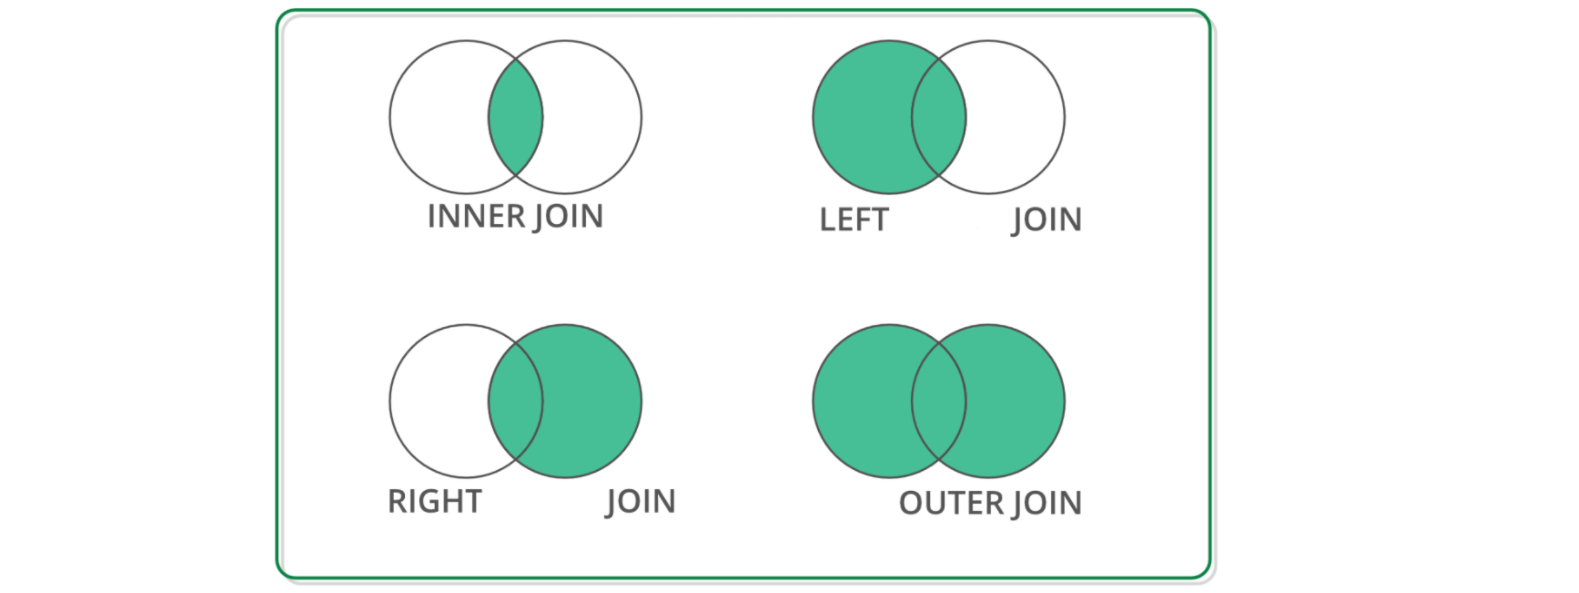


## Simple Concatenation with ``pd.concat`` 進行簡單連接

> ``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

`pd.concat()`可以用來對`Series`或`DataFrame`對象進行簡單的連接，就像可以用`np.concatenate()`來對數組進行簡單連接一樣：

In [2]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])
# pd.concat([ser1, ser2], sort=True) 
# pd.concat([ser1, ser2], axis=1, sort=True) 
# pd.concat([ser1, ser2], axis=1, sort=True, join='inner') 

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [3]:
pd.concat([ser1, ser2], axis=0, keys=['1', '2'])             # Defult is  #Stack
pd.concat([ser1, ser2], axis=0, keys=['1', '2']).unstack()   # unStack

,1,2,3,4,5,6
1,A,B,C,NaN,NaN,NaN
2,NaN,NaN,NaN,D,E,F


In [4]:
df_li = pd.DataFrame([[1, 2], [3, 4], [5, 6]],index=['a', 'b', 'c'],columns=['raga', 'anuraga'])
df_ri = pd.DataFrame([[1, 2], [3, 4], [5, 6]],index=['a', 'b', 'd'],columns=['braga', 'sraga'])

pd.concat([df_li, df_ri], axis=1, keys=['one', 'two'], sort=True, join='inner') 
pd.concat([df_li, df_ri], axis=1, keys=['1', '2', '3'], sort=True, join='outer')     
# pd.concat({'level1':df_li, 'level2':df_ri}, sort=True, join='outer')
# pd.concat({'level1':df_li, 'level2':df_ri}, sort=True, join='outer', axis=1) 
# pd.concat({'level1':df_li, 'level2':df_ri}, sort=True, join='outer', axis=1, names=['first', 'second'])
# pd.concat([df_li, df_ri], axis=0, join='outer', ignore_index=True, sort=True)
# pd.concat([df_li, df_ri], axis=1, join='outer', ignore_index=True, sort=True)

1             2      
  raga anuraga braga sraga
a  1.0     2.0   1.0   2.0
b  3.0     4.0   3.0   4.0
c  5.0     6.0   NaN   NaN
d  NaN     NaN   5.0   6.0

### example

In [5]:
df1 = pd.DataFrame({"key":["K0","K1","K2","K3"],"A":["A0","A1","A2","A3"],"B":["B0","B1","B2","B3"]})
df2 = pd.DataFrame({'key':['K0','K1','K2','K4'],'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']})

# inner join
pd.merge(df1, df2, how='inner', on='key')
pd.merge(df1, df2, how='outer', on='key')
pd.merge(df1, df2, how='left' , on='key')
pd.merge(df1, df2, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K4,NaN,NaN,C3,D3


In [6]:
df_m1 = pd.DataFrame({'key1': ['b', 'b', 'a'],'data1': range(3)})
df_m2 = pd.DataFrame({'key2': ['a', 'b'],'data2': range(2)})

pd.merge(df_m1, df_m2, left_on='key1', right_on='key2')                  
pd.merge(df_m1, df_m2, left_on='key1', right_on='key2', how='outer')  
pd.merge(df_m1, df_m2, left_on='key1', right_on='key2', how='left')    
pd.merge(df_m1, df_m2, left_on='key1', right_on='key2', how='right')

,key1,data1,key2,data2
0,a,2,a,0
1,b,0,b,1
2,b,1,b,1


In [7]:
df1 = pd.DataFrame({'key1': ['raga', 'raga', 'anuraga'],'key2': ['one', 'two', 'one'],'lval': [1, 2, 3]})
df2 = pd.DataFrame({'key1': ['raga', 'raga', 'anuraga', 'anuraga'],'key2': ['one', 'one', 'one', 'two'],'rval': [4, 5, 6, 7]})

pd.merge(df1, df2, on='key1')
pd.merge(df1, df2, on=['key1', 'key2'], how='outer') 
pd.merge(df1, df2, on=['key1', 'key2'], how='inner') 
pd.merge(df1, df2, on=['key1', 'key2'], how='left') 
pd.merge(df1, df2, on=['key1', 'key2'], how='right')

,key1,key2,lval,rval
0,raga,one,1.0,4
1,raga,one,1.0,5
2,anuraga,one,3.0,6
3,anuraga,two,NaN,7


## Specifying Set Arithmetic for Joins

## 指定合併的集合算術運算

> In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join.
This comes up when a value appears in one key column but not the other. Consider this example:

在上面的例子中，我們都忽略了在進行數據集合併時一個重要的內容：合併時所使用的集合算術運算類型。這部分內容對於當一個數據集的鍵值在另一個數據集中不存在時很有意義。看下例：

In [8]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],'food': ['fish', 'beans', 'bread']},columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],'drink': ['wine', 'beer']},columns=['name', 'drink'])
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


### One-to-one joins 一對一

> Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation seen in [Combining Datasets: Concat & Append](03.06-Concat-And-Append.ipynb).
As a concrete example, consider the following two ``DataFrames`` which contain information on several employees in a company:

也許最簡單的聯表操作類型就是一對一連接，在很多方面，這種聯表都和我們在[組合數據集：Concat 和 Append](03.06-Concat-And-Append.ipynb)中看到的按列進行數據集連接很相似。下面定義兩個`DataFrame`含有公司的一些員工信息作為一個具體的例子來說明：

In [9]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one joins 多對一

> Many-to-one joins are joins in which one of the two key columns contains duplicate entries.
For the many-to-one case, the resulting ``DataFrame`` will preserve those duplicate entries as appropriate.
Consider the following example of a many-to-one join:

多對一聯表的情況發生在兩個數據集的關鍵字列上的其中一個含有重複數據的時候。在這種多對一的情況下，結果的`DataFrame`會正確的保留那些重複的鍵值。看下面這個例子：

In [10]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

'df3'

'df4'

'pd.merge(df3, df4)'

### Many-to-many joins 多對多

> Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.
This will be perhaps most clear with a concrete example.
Consider the following, where we have a ``DataFrame`` showing one or more skills associated with a particular group.
By performing a many-to-many join, we can recover the skills associated with any individual person:

多對多聯表在概念上有一點混亂，但實際上良好定義了的。如果左右的數據集在關鍵字列上都有重複數據，那麼結果就是一個多對多的組合。當然用一個具體的例子來說明是很有幫助的。比如下面的數據集`df5`存儲的是一個崗位和其對應的技能。進行了多對多聯表後，我們可以獲得每個員工對應的技能表：

In [11]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

'df1'

'df5'

'pd.merge(df1, df5)'

## Example: US States Data

## 例子：美國州數據

> Merge and join operations come up most often when combining data from different sources.
Here we will consider an example of some data about US states and their populations.
The data files can be found at http://github.com/jakevdp/data-USstates/:

合併及聯表操作在你處理多個不同數據來源時會經常出現。下面我們使用美國州及其人口數據作為例子來進行更加直觀的說明。這些數據文件可以在http://github.com/jakevdp/data-USstates/ 中找到：

In [12]:
pop = pd.read_csv('input/pd-state-population.csv')
areas = pd.read_csv('input/pd-state-areas.csv')
abbrevs = pd.read_csv('input/pd-state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

'pop.head()'

'areas.head()'

'abbrevs.head()'

> We'll start with a many-to-one merge that will give us the full state name within the population ``DataFrame``.
We want to merge based on the ``state/region``  column of ``pop``, and the ``abbreviation`` column of ``abbrevs``.
We'll use ``how='outer'`` to make sure no data is thrown away due to mismatched labels.

我們先進行一個多對一的合併，將州全名和人口數據合併在一個`DataFrame`中。我們希望合併基於`pop`數據集的`state/region`列以及`abbreviation`數據集的`abbrevs`列。使用`how='outer'`來保證合併過程中不會因為不匹配的標籤而丟失任何數據。

In [13]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # 移除冗余的列
merged.head()

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_2573/3974799338.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged = merged.drop('abbreviation', 1) # 移除冗余的列


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [14]:
merged.isnull().any()  #讓我們檢查結果中是否有不匹配的情況，通過在數據集中尋找空值來查看
merged[merged['population'].isnull()].head()  #一些人口population數據是空的；再來看看是哪些。

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


> It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.More importantly, we see also that some of the new ``state`` entries are also null, which means that there was no corresponding entry in the ``abbrevs`` key!
Let's figure out which regions lack this match:

發現所有空的人口數據都是2000年前波多黎各的；這可能因為數據來源本來就沒有這些數據造成的。更重要的是，我們發現一些新的州`state`的數據也是空的，這意味著`abbrevs`列中不存在這些州的簡稱。再看看是哪些州有這種情況：

In [15]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

> We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key.
We can fix these quickly by filling in appropriate entries:

從上面的結果很容易發現：人口數據集中包括波多黎各（PR）和全美國（USA）的數據，而州簡稱數據集中卻沒有這兩者數據。通過填充相應的數據可以很快解決這個問題：

In [16]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


> There are nulls in the ``area`` column; we can take a look to see which regions were ignored here:> We see that our ``areas`` ``DataFrame`` does not contain the area of the United States as a whole.
We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

面積`area`列有空值；我們看看是哪裡出現的：結果顯示面積數據集不包括整個美國的面積。我們可以為這個空值插入正確的值（使用所有州的面積數據之和），但是這個例子中我們只需要簡單地移除空值數據即可，因為全美國的人口密度數據與我們前面的問題無關：

In [17]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [18]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


> Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population.
We'll use the ``query()`` function to do this quickly (this requires the ``numexpr`` package to be installed; see [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)):

現在我們需要數據都已經準備好了。要回答前面那個問題，首先要選擇出2010年相應的部分數據集以及不分年齡的全體人口數。我們使用`query()`函數來快速完成這項任務（這需要安裝`numexpr`包，參見[高性能Pandas: ``eval()`` 和 ``query()``](03.12-Performance-Eval-and-Query.ipynb)）：

In [19]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


> Now let's compute the population density and display it in order.
We'll start by re-indexing our data on the state, and then compute the result:

下面我們可以計算人口密度並排序輸出了。我們現將數據集按照`state`進行重新索引，然後計算結果：

In [20]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

> The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density, in residents per square mile.
We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey.

結果是美國州根據2010年人口密度的排名，包括華盛頓特區和波多黎各，數據是每平方英里的居住人數。結果顯示人口密度最稠密的地區是華盛頓特區（表中的the District of Columbia）；在其他的州中，人口密度最大的是新澤西。

In [22]:
density.tail()  #結果顯示密度最小的州 Alaska，平均每平方英里略大於1個居民。

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Example2 

In [23]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv('input/plt-movies.csv')   #dataset1  movieId / title / genres
rating = pd.read_csv('input/plt-ratings.csv')  #dataset2 userId / movieId / rating / timestamp
merge = pd.merge(movies, rating, on = 'movieId', how = 'inner') # movieId / title / genres / userId / rating / timestamp
merge.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
data = merge.drop(['movieId', 'userId', 'timestamp'], axis = 1)
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [28]:
data = pd.pivot_table(data, index = ['title','genres'], aggfunc = 'mean')
data.reset_index(level=['title','genres'], inplace = True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


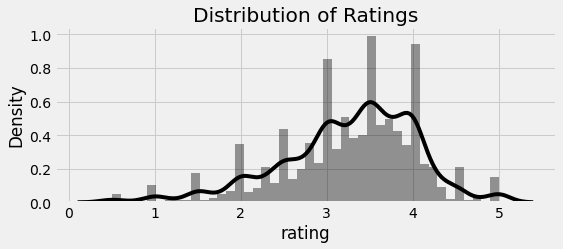

In [29]:
# lets check the Distribution of Ratings across the Movies

plt.rcParams['figure.figsize'] = (8, 3)
plt.style.use('fivethirtyeight')
sns.distplot(data['rating'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

<!--NAVIGATION-->
< [层次化的索引](03.05-Hierarchical-Indexing.ipynb) | [目录](Index.ipynb) | [组合数据集：Merge 和 Join](03.07-Merge-and-Join.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/03.06-Concat-And-Append.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
